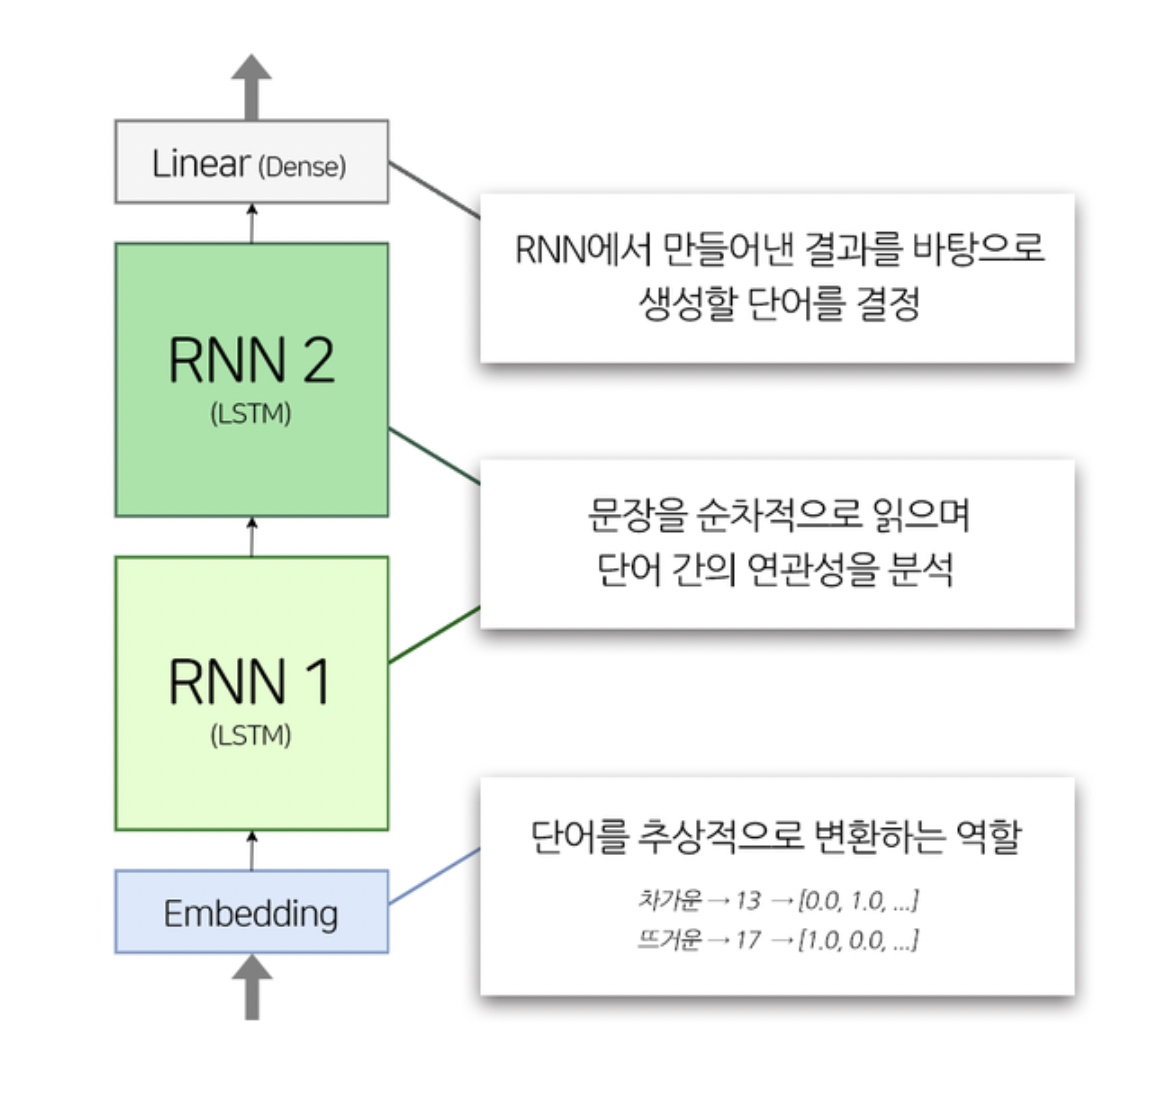

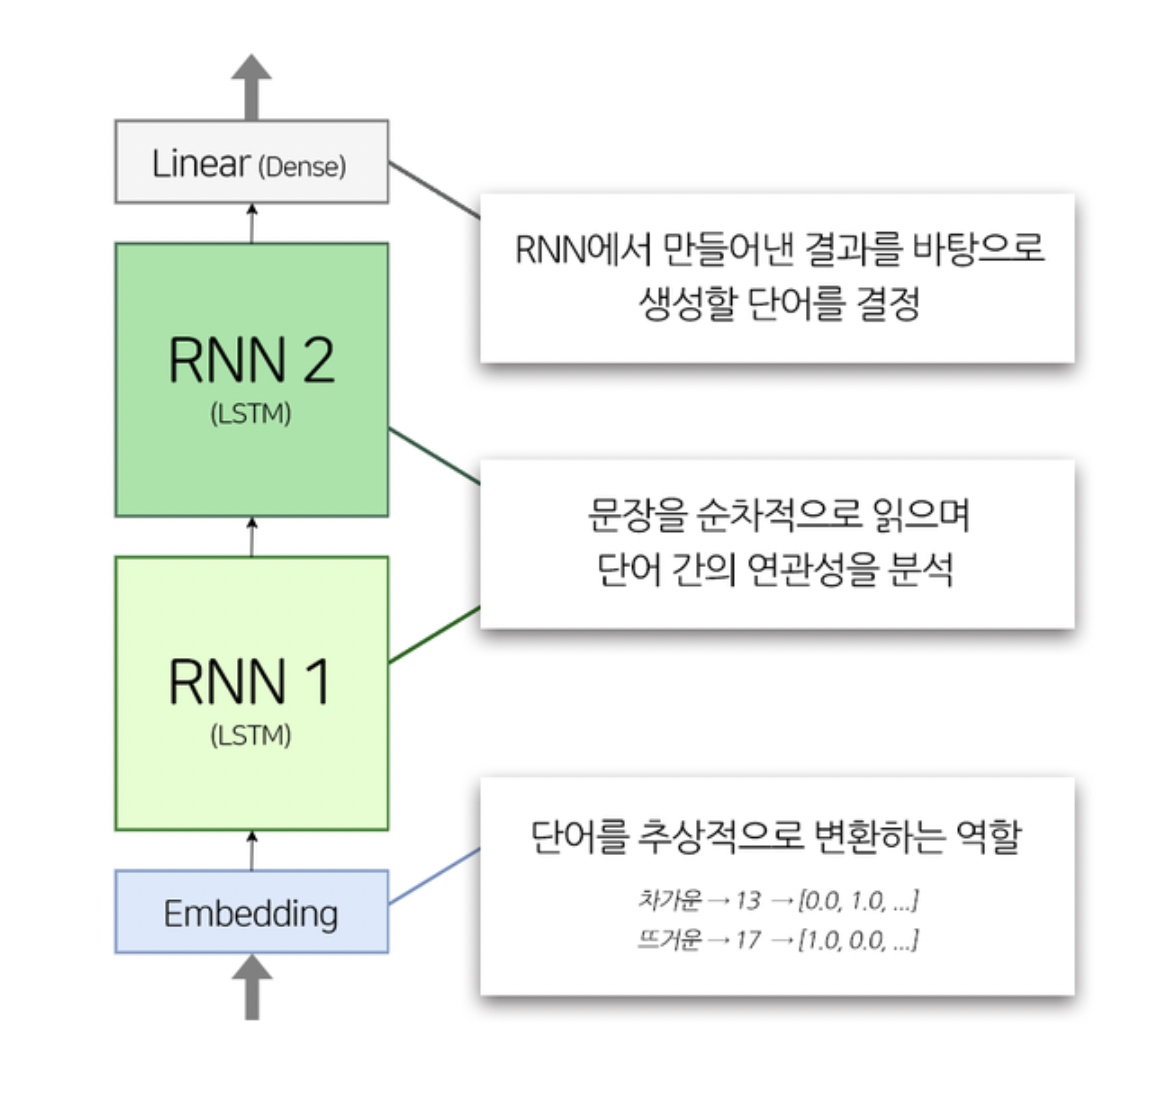

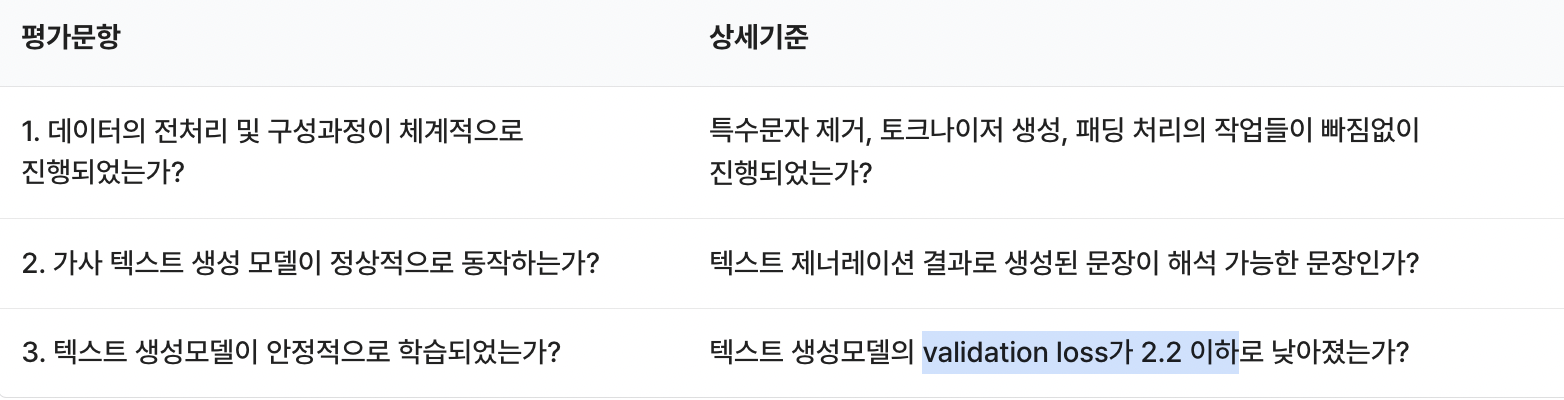

glob 모듈의 glob 함수는  
사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다  
`glob.glob`  
(pathname, *, root_dir=None, dir_fd=None, recursive=False, include_hidden=False)  
https://docs.python.org/3/library/glob.html

---
`pickle, glob, os.path`  
> glob는 파일들의 리스트를 뽑을 때 사용하는데,  
> 파일의 경로명을 이용해서 입맛대로 요리할 수 있답니다.

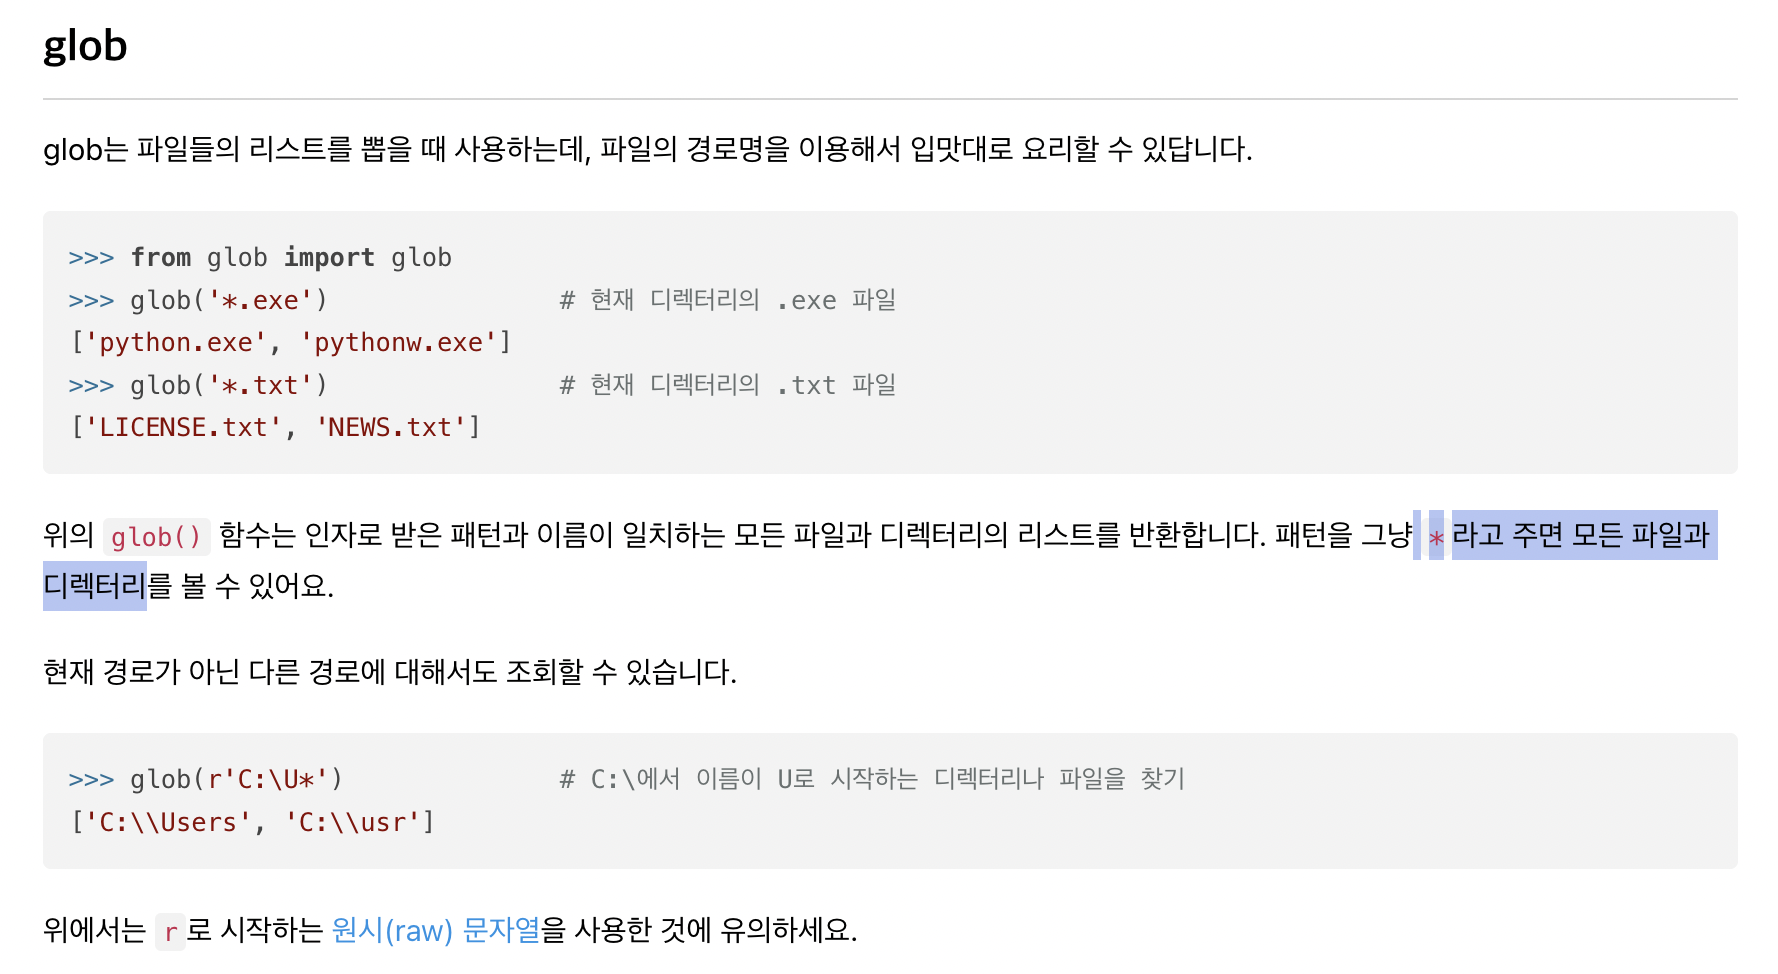
https://wikidocs.net/83

In [15]:
import glob
import os, re 
import numpy as np
import tensorflow as tf

In [7]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

### Step 1. 데이터 다운로드 
mkdir -p ~/aiffel/lyricist/models   
ln -s ~/data ~/aiffel/lyricist/data

### Step 2. 데이터 읽어오기

`os.getenv`(key, default=None)
> key = "HOME"

https://www.educative.io/answers/what-is-osgetenv-method-in-python

In [4]:
os.getenv(key = 'HOME')

'/aiffel'

In [5]:
txt_file_path = os.getenv('HOME')+'/aiffel/lyricist/data/lyrics/*' 

txt_list = glob.glob(txt_file_path)

In [6]:
txt_list

['/aiffel/aiffel/lyricist/data/lyrics/michael-jackson.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/blink-182.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/nursery_rhymes.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/jimi-hendrix.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/eminem.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/al-green.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/cake.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/bob-dylan.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/bjork.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/leonard-cohen.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/dickinson.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/prince.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/alicia-keys.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/dr-seuss.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/dj-khaled.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/drake.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/britney-spears.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/ludacris.txt',
 '/aiffel/aiffel/lyricist

`read()`   
파일 전체의 내용을 하나의 문자열로 읽어온다.  
`splitlines()`   
여러라인으로 구분되어 있는 문자열을 한라인씩 분리하여 리스트로 반환  
`extend()`  
리스트함수로 추가적인 내용을 연장 한다.

In [8]:
raw_corpus = [] 

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

In [9]:
print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

데이터 크기: 187088
Examples:
 ['', '', '[Spoken Intro:]']


In [12]:
raw_corpus[:5]

['',
 '',
 '[Spoken Intro:]',
 'You ever want something ',
 "that you know you shouldn't have "]

In [11]:
raw_corpus[-9:]

['Thats a hint to you David',
 'Throwin shots at Goliath',
 "'This the new testament where the victor is tha giant",
 'So you should get your way and lose the hate',
 'Remember males shouldnt be jealous thats a females trait',
 'Future I know they cant fuck with me cuz Im da center of tha world',
 'Future I know they cant fuck with me cuz Im da center of tha world',
 '',
 '']

### Step 3. 데이터 정제
`preprocess_sentence()`  
추가로 지나치게 긴 문장은 다른 데이터들이 과도한 Padding을 갖게 하므로 제거합니다.  
너무 긴 문장은 노래 가사 작사하기에 어울리지 않을 수도 있겠죠.  
그래서 이번에는 문장을 토큰화 했을 때  
token의 개수가 `15개`를 넘어가는 문장을  
학습 데이터에서 `제외`하기 를 권합니다.

1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
2. 특수문자 양쪽에 공백을 넣고
3. 여러개의 공백은 하나의 공백(" ")으로 바꿉니다
4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백(" ")으로 바꿉니다
5. 다시 양쪽 공백을 지웁니다
6. 문장 시작에는 `<start>`, 끝에는 `<end>`를 추가합니다

In [13]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

In [22]:
raw_corpus[-5:]

['Remember males shouldnt be jealous thats a females trait',
 'Future I know they cant fuck with me cuz Im da center of tha world',
 'Future I know they cant fuck with me cuz Im da center of tha world',
 '',
 '']

In [16]:
corpus = []

for sentence in raw_corpus: #
    # 우리가 원하지 않는 문장은 건너뜁니다
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
    
    preprocessed_sentence = preprocess_sentence(sentence) ### for loop 정돈시킨거
    corpus.append(preprocessed_sentence)

In [23]:
raw_corpus[-7:]

["'This the new testament where the victor is tha giant",
 'So you should get your way and lose the hate',
 'Remember males shouldnt be jealous thats a females trait',
 'Future I know they cant fuck with me cuz Im da center of tha world',
 'Future I know they cant fuck with me cuz Im da center of tha world',
 '',
 '']

In [20]:
len(corpus) # 175749
corpus[-5:]

['<start> this the new testament where the victor is tha giant <end>',
 '<start> so you should get your way and lose the hate <end>',
 '<start> remember males shouldnt be jealous thats a females trait <end>',
 '<start> future i know they cant fuck with me cuz im da center of tha world <end>',
 '<start> future i know they cant fuck with me cuz im da center of tha world <end>']

`tf.keras.preprocessing.text.Tokenizer`  
(
    __num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',__
    lower=True,
    split=' ',
    char_level=False,
    __oov_token=None,__
    document_count=0,
    **kwargs,
)     
Text tokenization utility class.  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer


`tf.keras.preprocessing.sequence.pad_sequences`  
(
    sequences,
    __maxlen=None,__
    dtype='int32',
    __padding='pre',__
    truncating='pre',
    value=0.0,
)
Pads sequences to the same length.  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences


---
7000단어를 기억할 수 있는 tokenizer를 만들겁니다
우리는 이미 문장을 정제했으니 filters가 필요없어요
7000단어에 포함되지 못한 단어는 '<unk>'로 바꿀거에요

corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
tokenizer.fit_on_texts(texts): 문자 데이터를 입력받아 리스트의 형태로 변환하는 메서드

준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
tokenizer.texts_to_sequences(texts): 텍스트 안의 단어들을 숫자의 시퀀스 형태로 변환하는 메서드

입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다

In [24]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=7000, 
        filters=' ',
        oov_token="<unk>"
    )
    tokenizer.fit_on_texts(corpus)
    tensor = tokenizer.texts_to_sequences(corpus)   
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post',maxlen=20)  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

oov = out of vocabulary

In [27]:
tensor, tokenizer = tokenize(corpus)

[[   2 2701 2584 ...    0    0    0]
 [   2    7  156 ...    0    0    0]
 [   2   17    7 ...    0    0    0]
 ...
 [   2  311    1 ...    0    0    0]
 [   2  735    5 ...    0    0    0]
 [   2  735    5 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f5c6837bc10>


tokenizer.index_word  
{1: '`<unk>`',
 2: '`<start>`',
 3: '`<end>`',
 4: ',',
 5: 'i',
 6: 'the',
    
----    
  996: 'deal',
 997: 'suck',
 998: 'share',
 999: 'snow',
 1000: 'hoo',
 ...}

In [32]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: 
        break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : i
6 : the
7 : you
8 : and
9 : a
10 : to


In [33]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  

# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

In [36]:
# len(src_input) # 175749
# src_input.shape # (175749, 19)
src_input[-1]

array([   2,  735,    5,   34,   45,  279,  128,   31,   12,  692,   87,
        173, 2334,   19, 1161,  143,    3,    0,    0], dtype=int32)

`2 <start>` ~ `3 <end>` + `0` 2개의 padding

In [39]:
# len(tgt_input) # 175749
# tgt_input.shape # (175749, 19)
tgt_input[-1]

array([ 735,    5,   34,   45,  279,  128,   31,   12,  692,   87,  173,
       2334,   19, 1161,  143,    3,    0,    0,    0], dtype=int32)

src를 왼쪽으로 한 칸 시프트 한 형태

In [40]:
src_input[0]

array([   2, 2701, 2584,    3,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

`2 <start>` ~ `3 <end>` + `0` 15개의 padding

In [41]:
tgt_input[0]

array([2701, 2584,    3,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

src가 왼쪽으로 한 칸 시프트 한 형태

In [45]:
tokenizer.num_words

7000

In [ ]:
BUFFER_SIZE = len(src_input) # 175749
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE # 686

VOCAB_SIZE = tokenizer.num_words + 1   # 7000 + 1

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
print(dataset) # (24015, 19) -> (19,)

dataset = dataset.shuffle(BUFFER_SIZE)
print(dataset)

dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
print(dataset)

### Step 4. 평가 데이터셋 분리

In [ ]:
enc_train, enc_val, dec_train, dec_val = # <코드 작성>

### Step 5. 인공지능 만들기

모델의 Embedding Size와 Hidden Size를 조절하며  
10 Epoch 안에 val_loss 값을 2.2 수준으로 줄일 수 있는 모델을 설계하세요!

잘 설계한 모델을 학습하려면,  
model.fit() 함수를 사용해야 합니다.  
model.fit() 함수에는 다양한 인자를 넣어주어야 하는데,  
가장 기본적인 인자로는 데이터셋과 epochs가 있습니다.  
'5. 실습 (2) 인공지능 학습시키기'에서의 예시와 같이 말이죠.

model.fit(dataset, epochs=30)  

하지만 model.fit() 함수의 epochs를 아무리 크게 넣는다 해도  
val_loss 값은 2.2 아래로 떨어지지 않습니다.  
이럴 경우는 batch size를 변경하는 것과 같이  
model.fit() 함수에 다양한 인자를 넣어주면 해결될 수도 있습니다.  
https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

---
`fit`(
    x=None,
    y=None,
    __batch_size=None,
    epochs=1__,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

클래스 분류 문제에서 softmax 함수를 거치면  
from_logits = False(default값),  
그렇지 않으면 from_logits = True.

`reduction`  
각자 나오는 값의 반환 원할 때 None을 사용한다.

https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy  

---
`tf.keras.losses.SparseCategoricalCrossentropy`(
    __from_logits=False__,
    ignore_class=None,
    __reduction=losses_utils.ReductionV2.AUTO__,
    name='sparse_categorical_crossentropy'
)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy( 
    from_logits=True, reduction='none')

generate_text 함수에 lyricist 라 정의한 모델을 이용해서  
"i love" 로 시작되는 문장을 생성

In [ ]:
generate_text(lyricist, 
              tokenizer, 
              init_sentence="<start> i love", 
              max_len=20)